In [1]:
import pandas as pd
import sklearn.linear_model as sk
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('movies_metadata.csv')

In [7]:
df.head(2) # view the first two rows of data
df.columns # view the column names 

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [9]:
df.drop(['adult', 'belongs_to_collection', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],axis=1,inplace=True) # remove excess columns 

In [10]:
df.head(2) # view newly created limited data set

,budget,revenue,status
0,30000000,373554033.0,Released
1,65000000,262797249.0,Released


In [11]:
df['status'].unique() #verify the types of statusd a movie could have 

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [14]:
filter_status = ['Rumored', 'Post Production', 'In Production','Planned', 'Canceled'] # Create a list of status that we want to exclude from analysis
df.drop(df[df['status'].isin(filter_status)].index,inplace=True) # remove the list of excess statuses

In [15]:
df['status'].unique() #verify that the filter removed the undesired status types

array(['Released', nan], dtype=object)

In [17]:
df.drop('status',axis=1,inplace=True)
df.head(2) # remove status column to further simplify data set

,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0


In [19]:
df['budget'].dtype # check data type of new columns


dtype('O')

In [20]:
df['revenue'].dtype

dtype('float64')

In [21]:
df['budget']=df['budget'].convert_dtypes()
df['budget'].dtype # convert data types to string.. part of a work aorund to convert dtype to float. NAN values may cause error if converting directly to float

string[python]

In [22]:
df.budget = pd.to_numeric(df['budget'],errors='coerce')
df.budget.dtype #string to float conversion

dtype('float64')

In [25]:
df[df['budget']<100000].shape # find count of movies with a budget less than 100k

(36782, 2)

In [26]:
df.drop(df[df['budget']<=100000].index,inplace=True)
df.shape # drop movies with less than 100k budget

(8282, 2)

In [27]:
df[df['revenue']<=10000].shape # find movies with less than 10k revenue 

(3058, 2)

In [28]:
df.drop(df[df['revenue']<=10000].index,inplace=True)
df.shape #drop movies with less than 10k revenue

(5224, 2)

In [29]:
df.isnull().values.any() # check for null values in either column

True

In [30]:
df.dropna(how="all",inplace=True) #drop rows with any null values 

In [31]:
df.shape

(5221, 2)

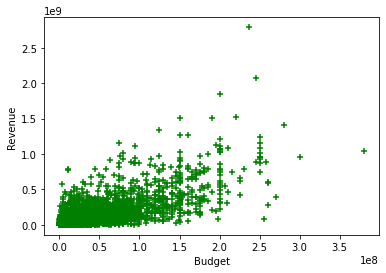

In [33]:
plt.scatter(df['budget'],df['revenue'],marker="+",color="green") #create chart with x and y mapped to our columns
plt.xlabel("Budget") #label the x-axis
plt.ylabel("Revenue") #label the y axis 
plt.show() 

In [35]:
reg = sk.LinearRegression() # create a variable for the linear regression function
reg.fit(df[['budget']],df['revenue']) # perform regression on the two variables

LinearRegression()

In [36]:
reg.coef_ #find the coefficent

array([3.0245148])

In [37]:
reg.intercept_ # find the intercept
# Regression line Y= 3.0245148x - 3866410.6975899637

-3866410.6975899637

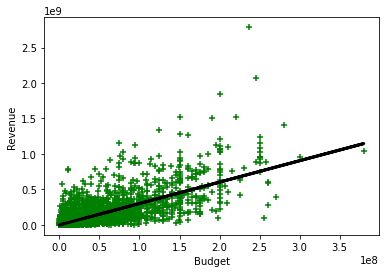

In [38]:
plt.scatter(df['budget'],df['revenue'],marker="+",color="green") 
plt.plot(df[['budget']],reg.predict(df[['budget']]),color="black",linewidth=3) #new regression line plotted
plt.xlabel("Budget") 
plt.ylabel("Revenue") 
plt.show() 

In [43]:
reg.predict([[5000000]]) #predict the revenue based upon selected budget

array([11256163.29963944])

In [44]:
reg.score(df[['budget']],df['revenue']) # check the R value. Pretty good considering it is using only one varaible! 

0.5301877787402028